# WeatherPy



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pyowm
# Import API key
import api_keys
import os
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Import datetime
import datetime
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
%matplotlib inline

In [2]:
# Add api key
owm = pyowm.OWM(api_keys.api_key) 

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# To store city lats
final_lats = []
final_lngs = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        final_lats.append(lat_lng[0])
        final_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)


966

In [4]:
city_df = pd.DataFrame(cities)
city_df.to_csv("city only.csv")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_data = {}
# Loop over each city
print("Started Processing")

for i in range(len(cities)):
    print("Processing Record "+str(i+1) +" " +cities[i])
    try:
    #         observation = owm.weather_at_place(cities[i])
        observation = owm.weather_at_coords(lat=float(final_lats[i]) , lon= float(final_lngs[i]) )

        w = observation.get_weather()            
        # Weather details
        temp = w.get_temperature('fahrenheit')['temp']
        humidity = w.get_humidity()
        clouds = w.get_clouds()
        wind_speed = w.get_wind()['speed']
        city_data = {'city':cities[i],'temp':temp,'humidity':humidity, 'clouds':clouds, 'wind_speed':wind_speed,
                    'lat':final_lats[i],'lon':final_lngs[i]}
        weather_data[i] = city_data
    except:
        print("City Not Found")
print("Finished Processing")

Started Processing
Processing Record 1 jamestown
Processing Record 2 hobart
Processing Record 3 yellowknife
Processing Record 4 catuday
Processing Record 5 ushuaia
Processing Record 6 cuxhaven
Processing Record 7 chokurdakh
Processing Record 8 matara
Processing Record 9 hermanus
Processing Record 10 rikitea
Processing Record 11 aleksandrov gay
Processing Record 12 sinnamary
Processing Record 13 saldanha
Processing Record 14 atuona
Processing Record 15 punta arenas
Processing Record 16 pahrump
Processing Record 17 samusu
Processing Record 18 dongsheng
Processing Record 19 bethel
Processing Record 20 flin flon
Processing Record 21 tuktoyaktuk
Processing Record 22 albany
Processing Record 23 illoqqortoormiut
Processing Record 24 dukat
Processing Record 25 mitu
Processing Record 26 kolyvan
Processing Record 27 finnsnes
Processing Record 28 hilo
Processing Record 29 marawi
Processing Record 30 mys shmidta
Processing Record 31 padang
Processing Record 32 naze
Processing Record 33 puerto ayor

Processing Record 265 luganville
Processing Record 266 gazli
Processing Record 267 kankon
Processing Record 268 port augusta
Processing Record 269 umm kaddadah
Processing Record 270 dwarka
Processing Record 271 tirumullaivasal
Processing Record 272 olafsvik
Processing Record 273 noumea
Processing Record 274 luoyang
Processing Record 275 mitsamiouli
Processing Record 276 hervey bay
Processing Record 277 barentsburg
Processing Record 278 narsaq
Processing Record 279 kavaratti
Processing Record 280 ponta do sol
Processing Record 281 magangue
Processing Record 282 kavieng
Processing Record 283 vanavara
Processing Record 284 srikakulam
Processing Record 285 marigot
Processing Record 286 richards bay
Processing Record 287 honiara
Processing Record 288 karaul
Processing Record 289 kanniyakumari
Processing Record 290 guaymas
Processing Record 291 berdyuzhye
Processing Record 292 kulu
Processing Record 293 griffin
Processing Record 294 qaanaaq
Processing Record 295 barrow
Processing Record 296 

Processing Record 528 piacenza
Processing Record 529 tall kayf
Processing Record 530 taltal
Processing Record 531 dzhusaly
Processing Record 532 great malvern
Processing Record 533 buta
Processing Record 534 mendi
Processing Record 535 tidore
Processing Record 536 ust-tsilma
Processing Record 537 inta
Processing Record 538 garden city
Processing Record 539 khipro
Processing Record 540 nizhnevartovsk
Processing Record 541 labuhan
Processing Record 542 katherine
Processing Record 543 yeppoon
Processing Record 544 coihaique
Processing Record 545 koslan
Processing Record 546 roald
Processing Record 547 lakes entrance
Processing Record 548 sechura
Processing Record 549 wanaka
Processing Record 550 hofn
Processing Record 551 svetlaya
Processing Record 552 new amsterdam
Processing Record 553 visnes
Processing Record 554 amapa
Processing Record 555 constitucion
Processing Record 556 ardistan
Processing Record 557 mount isa
Processing Record 558 sinegorye
Processing Record 559 nazare
Processing

Processing Record 792 vao
Processing Record 793 kargil
Processing Record 794 warqla
Processing Record 795 mashhad
Processing Record 796 ternate
Processing Record 797 lima
Processing Record 798 nogliki
Processing Record 799 ruatoria
Processing Record 800 bagado
Processing Record 801 asgabat
Processing Record 802 grunwald
Processing Record 803 puerto del rosario
Processing Record 804 buin
Processing Record 805 kulhudhuffushi
Processing Record 806 zhenhai
Processing Record 807 turayf
Processing Record 808 blatec
Processing Record 809 talnakh
Processing Record 810 alice springs
Processing Record 811 jiroft
Processing Record 812 campoverde
Processing Record 813 puerto ayacucho
Processing Record 814 luau
Processing Record 815 mezen
Processing Record 816 yankton
Processing Record 817 monoharpur
Processing Record 818 petrozavodsk
Processing Record 819 chaumont
Processing Record 820 gboko
Processing Record 821 tartus
Processing Record 822 riyadh
Processing Record 823 clarence town
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame.from_dict(weather_data, orient= 'index')

In [7]:
# create the ouptut directory
outdir = output_data_file.split("/")[0]
if not os.path.exists(outdir):
    os.mkdir(outdir)
df.to_csv(output_data_file)

In [8]:
df.head()

,city,temp,humidity,clouds,wind_speed,lat,lon
0,jamestown,73.40,100,92,6.82,-19.783967,-3.507627
1,hobart,-3.50,89,32,11.27,-69.932950,146.254549
2,yellowknife,-18.71,83,36,2.72,85.315926,-111.933356
3,catuday,77.59,100,0,0.47,17.525842,118.040516
4,ushuaia,-7.01,73,44,5.72,-88.119090,-84.760843


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
df.head()

,city,temp,humidity,clouds,wind_speed,lat,lon
0,jamestown,73.40,100,92,6.82,-19.783967,-3.507627
1,hobart,-3.50,89,32,11.27,-69.932950,146.254549
2,yellowknife,-18.71,83,36,2.72,85.315926,-111.933356
3,catuday,77.59,100,0,0.47,17.525842,118.040516
4,ushuaia,-7.01,73,44,5.72,-88.119090,-84.760843


In [10]:
date = str(datetime.datetime.now())

In [11]:
date = date.split(" ")[0]

#### Latitude vs. Temperature Plot

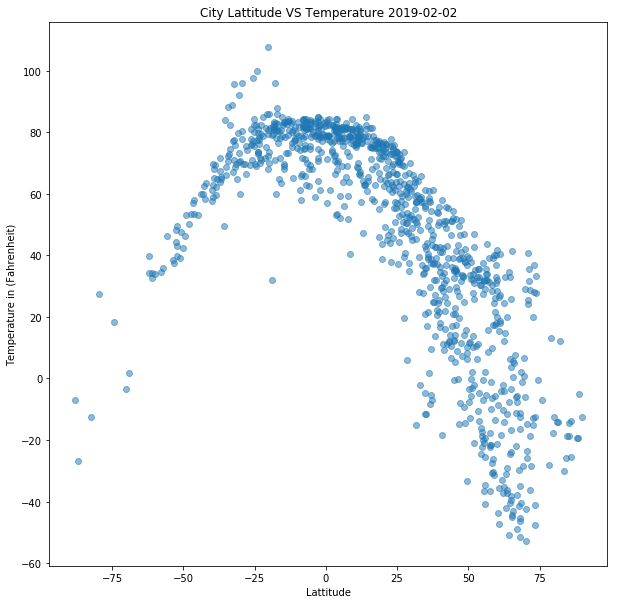

In [12]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.lat,df.temp,  alpha=0.5 )
plt.title("City Lattitude VS Temperature "+date)
plt.xlabel("Lattitude")
plt.ylabel("Temperature in (Fahrenheit)")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()


#### Latitude vs. Humidity Plot

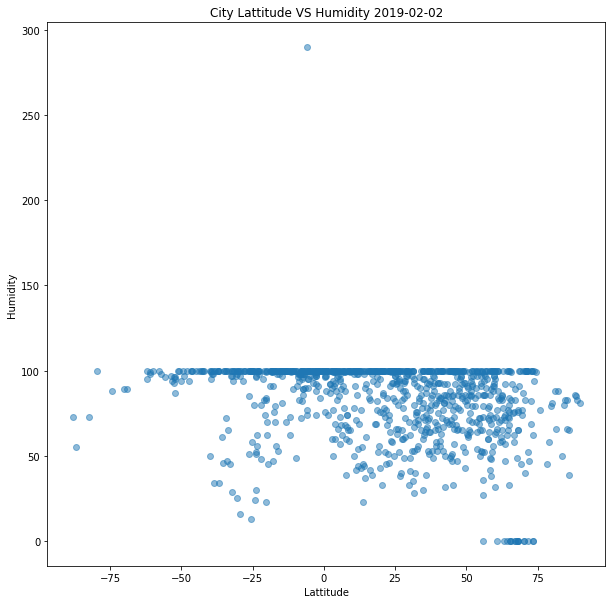

In [13]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.lat,df.humidity,  alpha=0.5 )
plt.title("City Lattitude VS Humidity "+date)
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()


#### Latitude vs. Cloudiness Plot

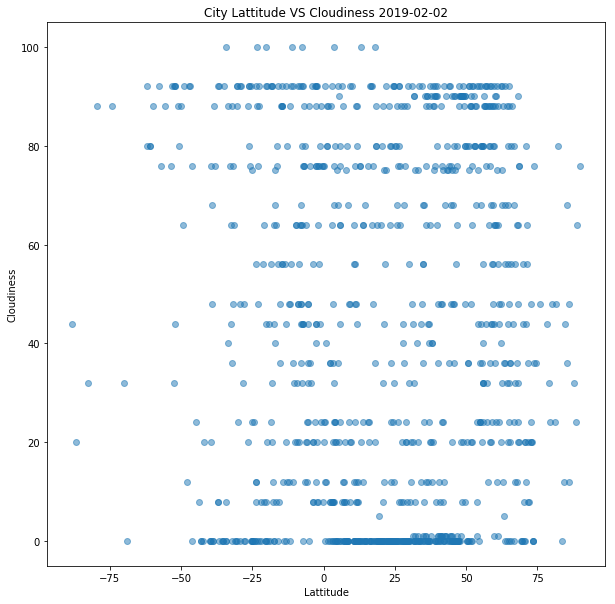

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.lat,df.clouds,  alpha=0.5 )
plt.title("City Lattitude VS Cloudiness "+date)
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()


#### Latitude vs. Wind Speed Plot

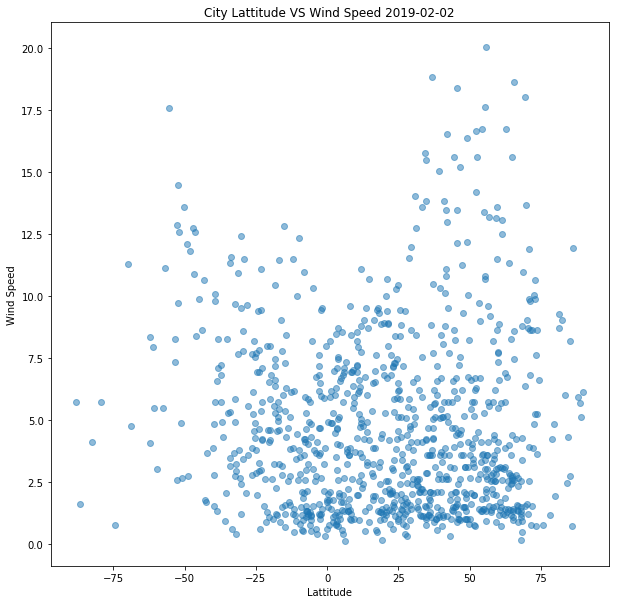

In [15]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.lat,df.wind_speed,  alpha=0.5 )
plt.title("City Lattitude VS Wind Speed "+date)
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()


# Written description of three observable trends based on the data.


* There is a quadratic relationship between latitude and temperature. As we go closer to equator the temperature increases . As we go further than latitude the temperature decreases.
*  Latitude of city and humidity is completely random and they've no strong relationship.
*  Cloudiness and lattitude is also completely random and they've no strong relationship.. For any lattitude Cloudiness of a city varies between high and low.
* Windspeed and lattitude of city are realated somehow on a small fraction. For furhtest to the equator we can see few cities wind speed is the hightest and closest to the  equator lower than other city. 